In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs 
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized print(e)
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from minivggnet import MiniVGGNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
print("[INFO] accessing CIFAR-10 data...")
((trainX, trainY),(testX,testY))=cifar10.load_data()

trainX=trainX.astype("float")/255.0
testX=testX.astype("float")/255.0

print(trainX.shape)
print(testX.shape)

# convert the labels from integers to vectors
lb=LabelBinarizer()
trainY=lb.fit_transform(trainY)
testY=lb.transform(testY)

print(trainY.shape)
print(testY.shape)

# initialize the label names for the CIFAR-10 dataset
labelNames=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

[INFO] accessing CIFAR-10 data...
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [11]:
# initialize the optimizer and model
epoch_param=10
print("[INFO] compiling model...")
INIT_LR=0.01
opt=SGD(lr=INIT_LR,decay=0.01/epoch_param,momentum=0.9,nesterov=True)
model=MiniVGGNet.build(width=32,height=32,depth=3,classes=10)
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H=model.fit(trainX,trainY,validation_data=(testX,testY),batch_size=64,epochs=epoch_param,verbose=0)

[INFO] compiling model...
[INFO] training network...


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.90      0.84      0.87      1000
           2       0.72      0.57      0.64      1000
           3       0.60      0.54      0.57      1000
           4       0.66      0.76      0.71      1000
           5       0.67      0.64      0.65      1000
           6       0.68      0.91      0.78      1000
           7       0.83      0.79      0.81      1000
           8       0.87      0.87      0.87      1000
           9       0.82      0.87      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



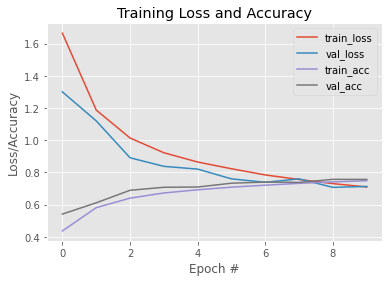

In [19]:
# evaluate the network
print("[INFO] evaluating network...")
predictions=model.predict(testX,batch_size=64)
cr=classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in range(10)])
print(cr)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,epoch_param),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,epoch_param),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,epoch_param),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,epoch_param),H.history["val_accuracy"],label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [21]:
model.evaluate(testX,testY,verbose=0)

[0.7122504115104675, 0.7559999823570251]

In [22]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}